In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
energy = pd.DataFrame(columns = ["day", "LCLid", "energy_sum"])

for i in range(112):
    df = pd.read_csv(f"D:\VIT\Semester-7 (Fall)\CSE1901 - Capstone Project\Dataset\daily_dataset\daily_dataset\\block_{str(i)}.csv")
    df = df[["day", "LCLid", "energy_sum"]]
    df.reset_index()
    energy = pd.concat([energy, df], ignore_index=True)

print(energy.dtypes)
print(len(energy))
energy.to_csv('energy_total.csv')

day            object
LCLid          object
energy_sum    float64
dtype: object
3510433


## Energy data

In [17]:
housecount = energy.groupby('day')[['LCLid']].nunique()
housecount.head()

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41
2011-11-27,41


<Axes: xlabel='day'>

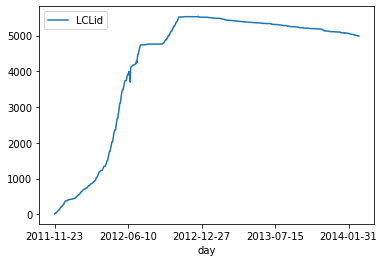

In [18]:
housecount.plot()

In [19]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on=['day'])
energy = energy.reset_index()
energy.count()

day           829
energy_sum    829
LCLid         829
dtype: int64

In [20]:
energy['day'] = pd.to_datetime(energy['day'],format='%Y-%m-%d').dt.date

In [21]:
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy['day']))
print("Ending Point of Data at Day Level",max(energy['day']))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [22]:
energy.describe()

,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,42870.715689,4234.539204,10.358458
std,20141.286953,1789.994799,1.886206
min,90.385000,13.000000,0.208997
25%,34421.895002,4084.000000,8.565752
50%,45846.575997,5138.000000,10.372293
75%,58795.512000,5369.000000,11.832222
max,82650.492003,5541.000000,15.940238


## Weather data

In [23]:
weather = pd.read_csv("D:\VIT\Semester-7 (Fall)\CSE1901 - Capstone Project\Dataset\weather_daily_darksky.csv")
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [24]:
weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [25]:
weather['day']=  pd.to_datetime(weather['time'])
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [26]:
weather_energy =  energy.merge(weather,on='day')
weather_energy.head()

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08


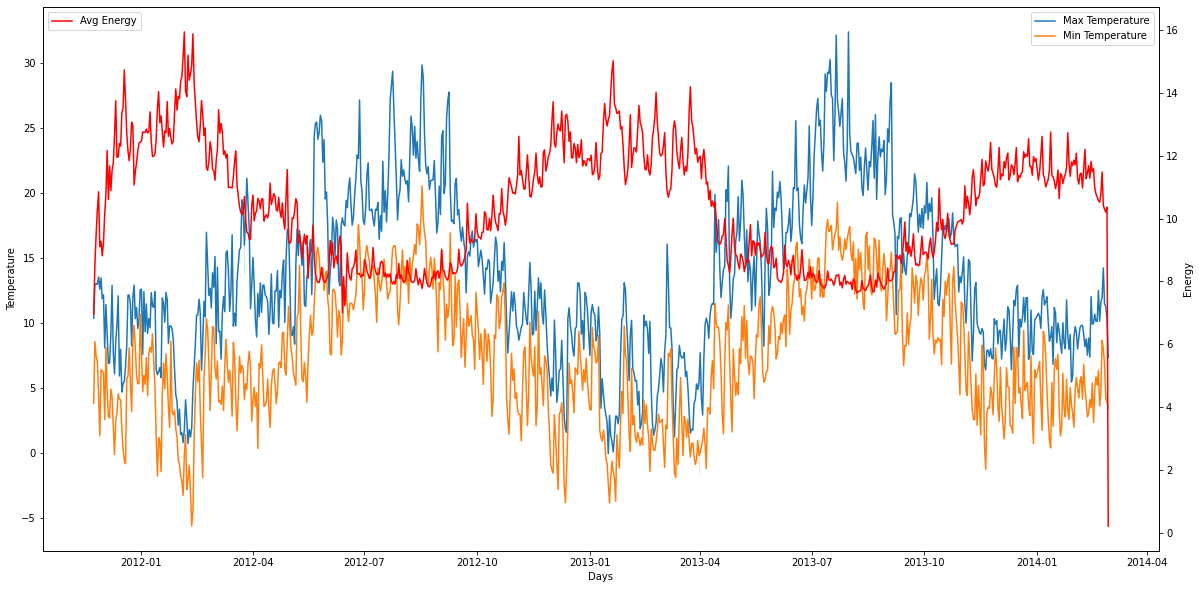

In [31]:
# TEMPERATURE AND ENERGY
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Days')
ax1.set_ylabel('Temperature')
sns.lineplot(x='day', y='temperatureMax', data=weather_energy, label='Max Temperature')
sns.lineplot(x='day', y='temperatureMin', data=weather_energy, label='Min Temperature')

ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
sns.lineplot(x='day', y='avg_energy', data=weather_energy, color='red', label='Avg Energy')
plt.legend(loc='upper left')
plt.show()

energy and temp have inverse relation

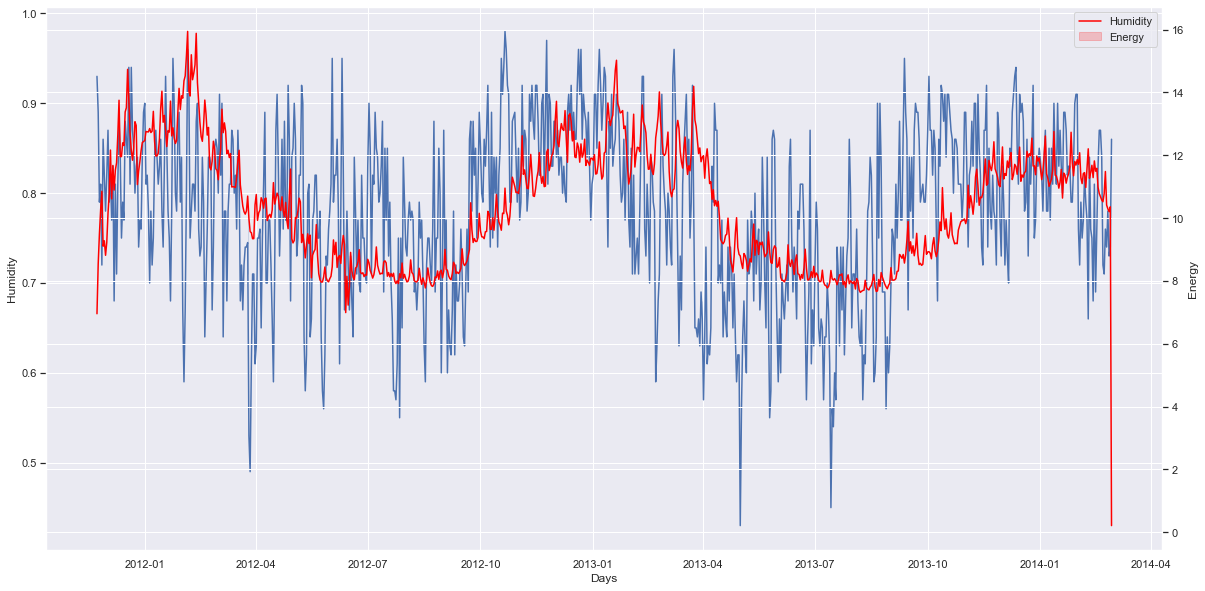

In [33]:
# HUMIDITY AND ENERGY

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Days')
ax1.set_ylabel('Humidity')
sns.lineplot(data=weather_energy, x='day', y='humidity', ax=ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
sns.lineplot(data=weather_energy, x='day', y='avg_energy', color="red", ax=ax2)

plt.legend(labels=['Humidity', 'Energy'])
plt.show()

energy and humidity have direct relation

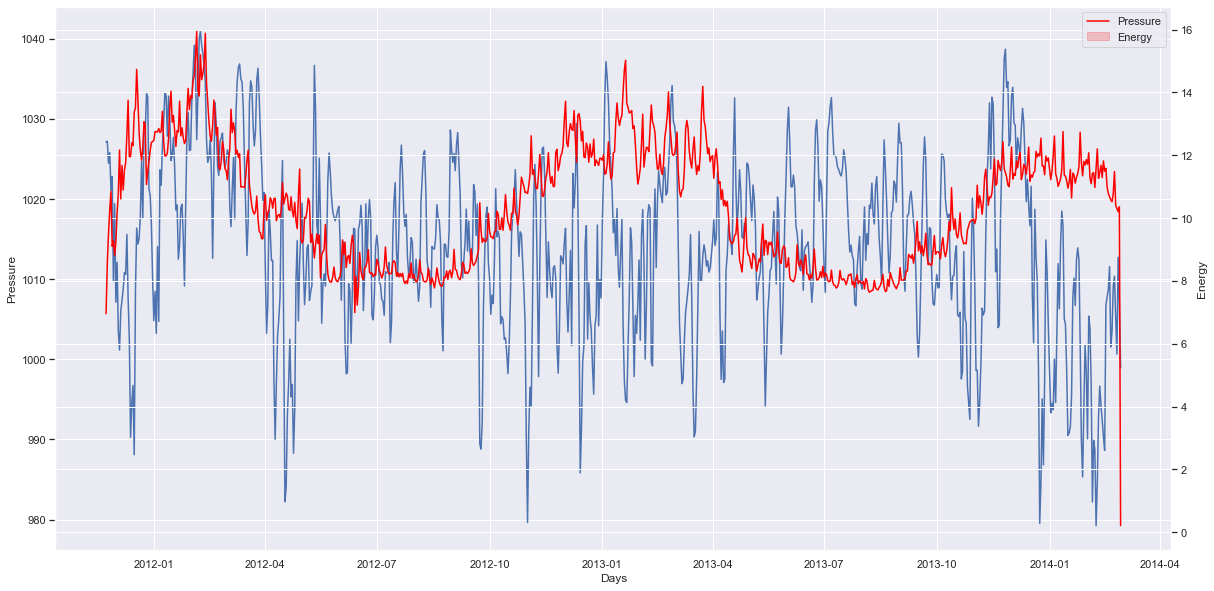

In [34]:
# PRESSURE AND ENERGY

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Days')
ax1.set_ylabel('Pressure')
sns.lineplot(data=weather_energy, x='day', y='pressure', ax=ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
sns.lineplot(data=weather_energy, x='day', y='avg_energy', color="red", ax=ax2)

plt.legend(labels=['Pressure', 'Energy'])
plt.show()

pressure and energy have no relation

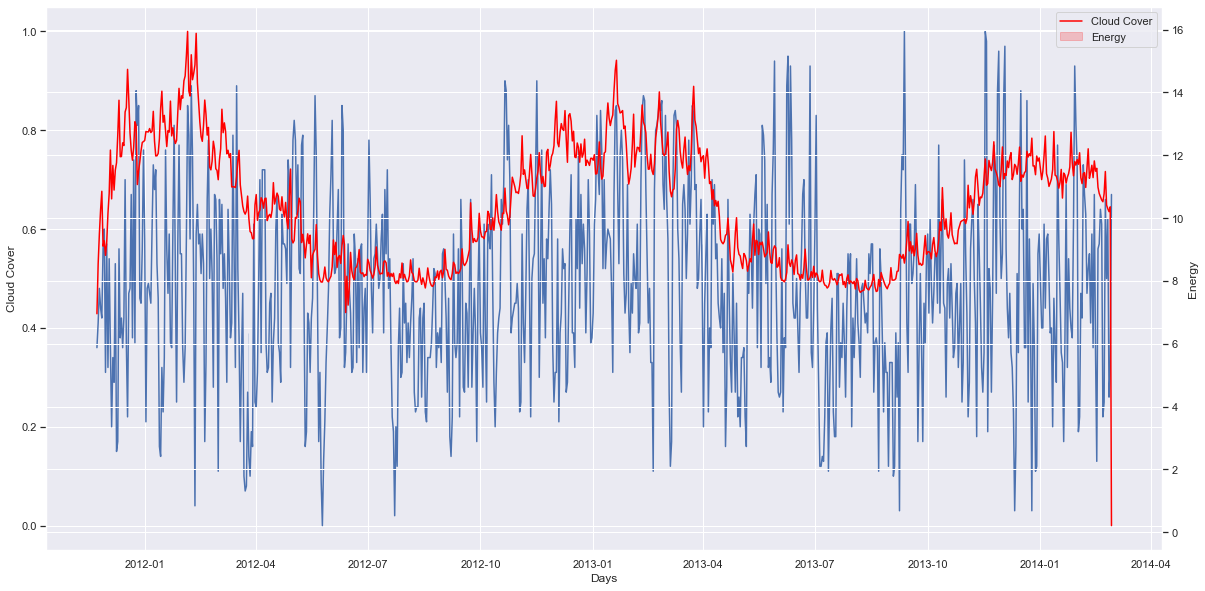

In [36]:
# CLOUD COVER AND ENERGY

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Days')
ax1.set_ylabel('Cloud Cover')
sns.lineplot(data=weather_energy, x='day', y='cloudCover', ax=ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
sns.lineplot(data=weather_energy, x='day', y='avg_energy', color="red", ax=ax2)

plt.legend(labels=['Cloud Cover', 'Energy'])
plt.show()

cloud cover and energy have direct relation

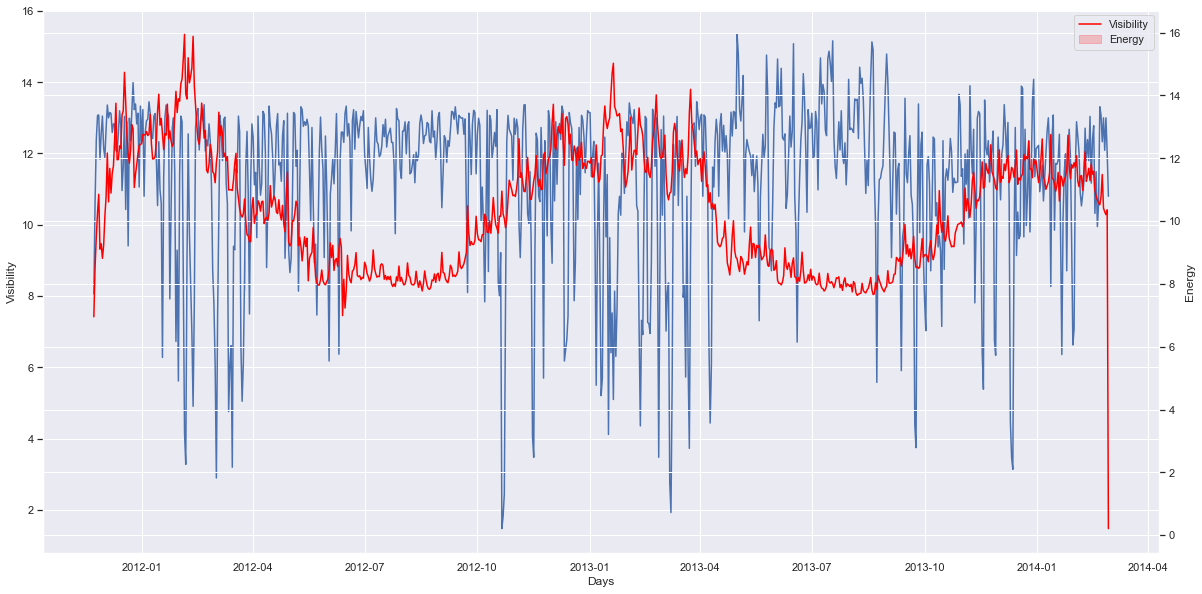

In [37]:
# VISIBILITY AND ENERGY

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Days')
ax1.set_ylabel('Visibility')
sns.lineplot(data=weather_energy, x='day', y='visibility', ax=ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
sns.lineplot(data=weather_energy, x='day', y='avg_energy', color="red", ax=ax2)

plt.legend(labels=['Visibility', 'Energy'])
plt.show()

visibility and energy have no relation

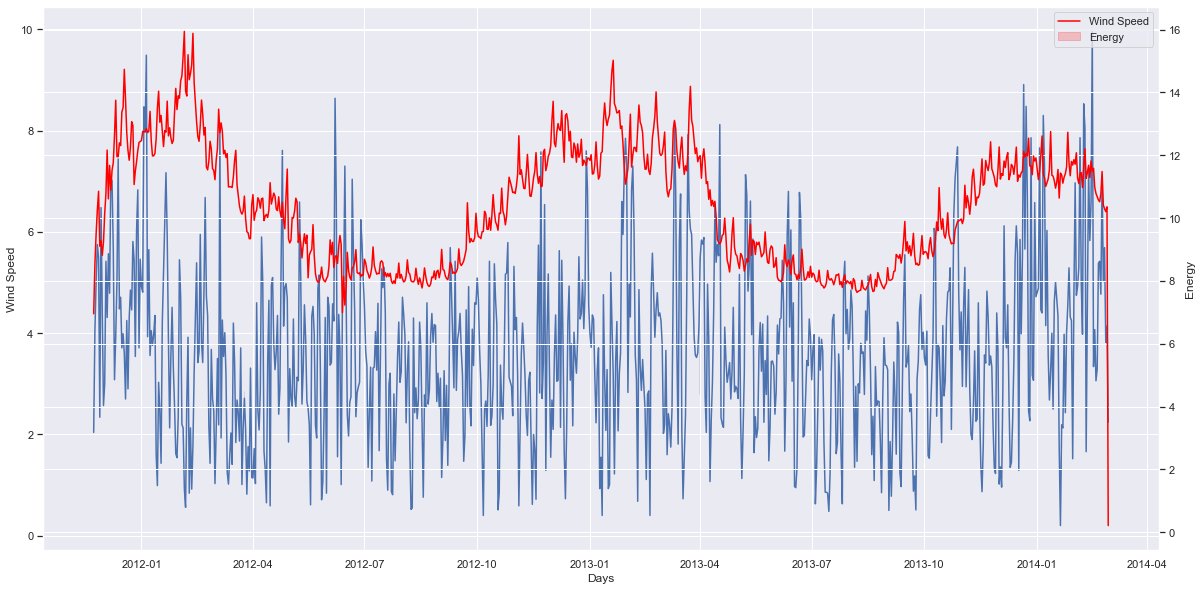

In [39]:
# WIND SPEED AND ENERGY

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Days')
ax1.set_ylabel('Wind Speed')
sns.lineplot(data=weather_energy, x='day', y='windSpeed', ax=ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
sns.lineplot(data=weather_energy, x='day', y='avg_energy', color="red", ax=ax2)

plt.legend(labels=['Wind Speed', 'Energy'])
plt.show()

wind speed and energy have no relation

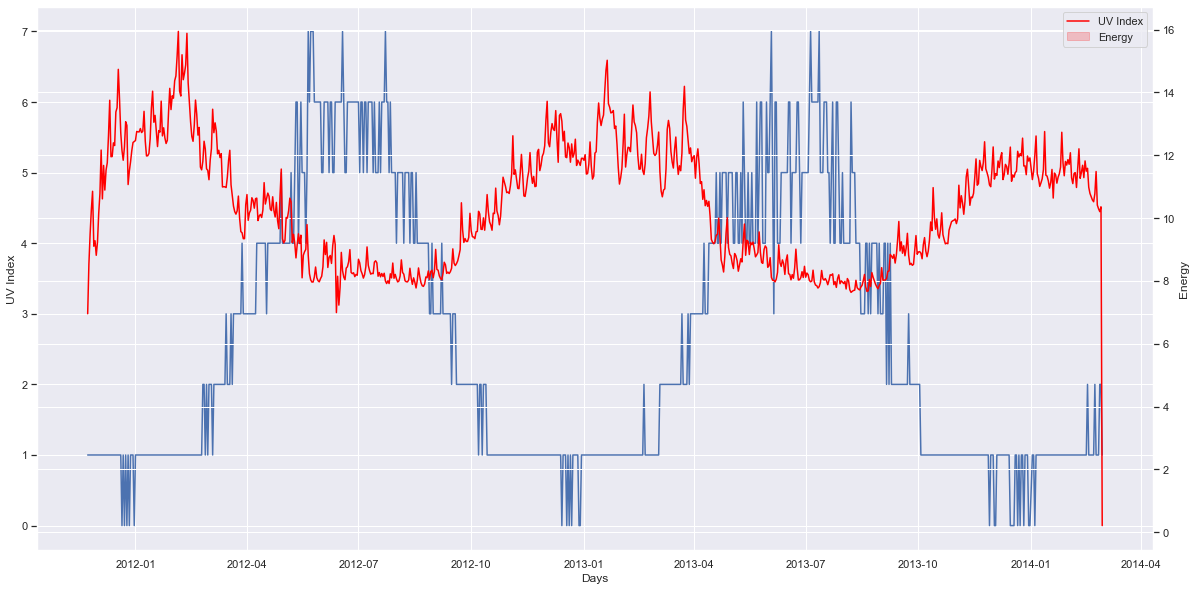

In [40]:
# UV INDEX AND ENERGY

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Days')
ax1.set_ylabel('UV Index')
sns.lineplot(data=weather_energy, x='day', y='uvIndex', ax=ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
sns.lineplot(data=weather_energy, x='day', y='avg_energy', color="red", ax=ax2)

plt.legend(labels=['UV Index', 'Energy'])
plt.show()

UV Index and energy have inverse relation

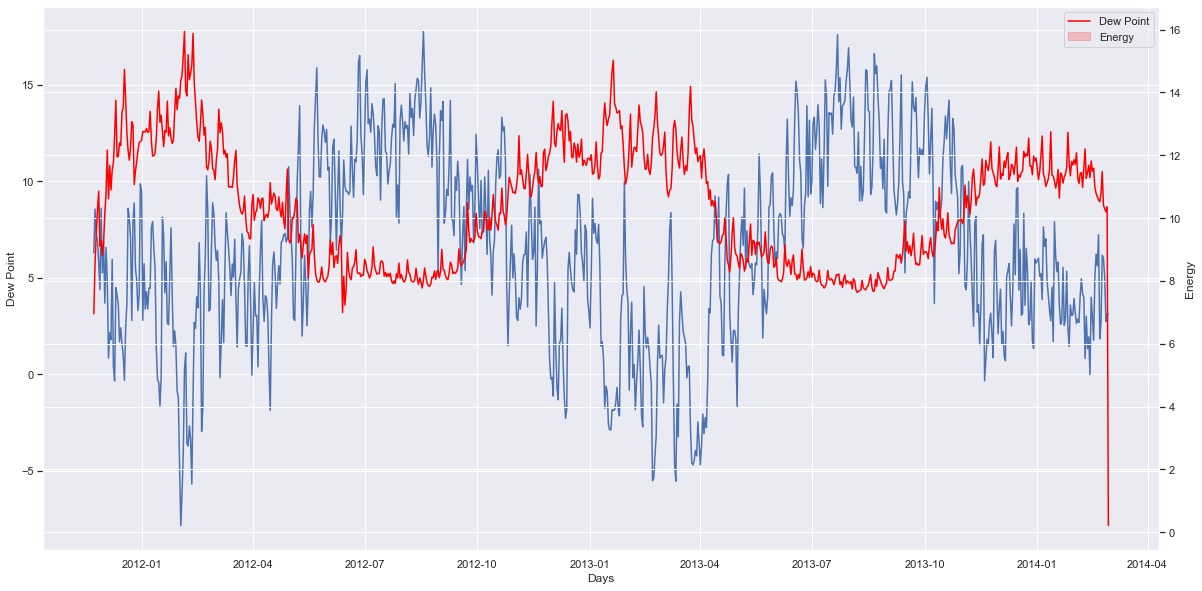

In [41]:
# DEW POINT AND ENERGY

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Days')
ax1.set_ylabel('Dew Point')
sns.lineplot(data=weather_energy, x='day', y='dewPoint', ax=ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
sns.lineplot(data=weather_energy, x='day', y='avg_energy', color="red", ax=ax2)

plt.legend(labels=['Dew Point', 'Energy'])
plt.show()

dew point and energy are inversely related

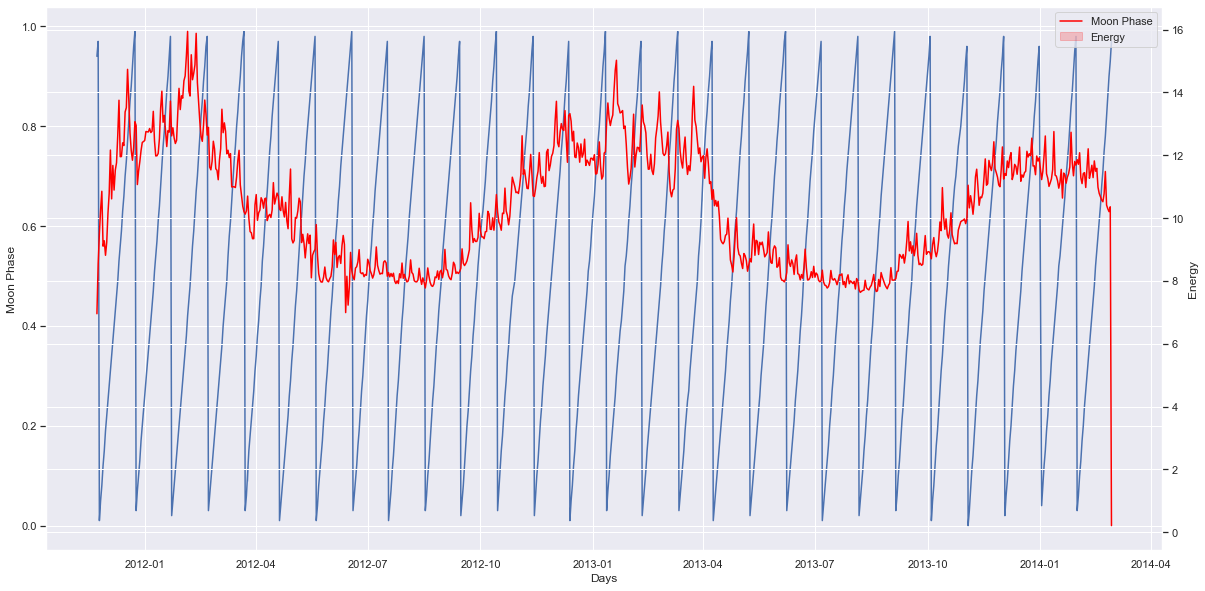

In [42]:
# MOON PHASE AND ENERGY

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Days')
ax1.set_ylabel('Moon Phase')
sns.lineplot(data=weather_energy, x='day', y='moonPhase', ax=ax1)

ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
sns.lineplot(data=weather_energy, x='day', y='avg_energy', color="red", ax=ax2)

plt.legend(labels=['Moon Phase', 'Energy'])
plt.show()

moon phase and energy have no relation

In [43]:
cor_matrix = weather_energy[['avg_energy','temperatureMax','dewPoint', 'cloudCover', 'windSpeed','pressure', 'visibility', 'humidity','uvIndex', 'moonPhase']].corr()
cor_matrix

,avg_energy,temperatureMax,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,moonPhase
avg_energy,1.000000,-0.843227,-0.753353,0.239670,0.148022,-0.018157,-0.243771,0.358299,-0.727403,-0.031500
temperatureMax,-0.843227,1.000000,0.865038,-0.333409,-0.153602,0.118933,0.259108,-0.404899,0.696497,0.003636
dewPoint,-0.753353,0.865038,1.000000,-0.025207,-0.092212,-0.028121,0.042633,0.055514,0.486692,-0.008239
cloudCover,0.239670,-0.333409,-0.025207,1.000000,0.170235,-0.101079,-0.330177,0.480056,-0.248695,-0.062126
windSpeed,0.148022,-0.153602,-0.092212,0.170235,1.000000,-0.344354,0.281088,-0.042391,-0.152634,-0.023273
pressure,-0.018157,0.118933,-0.028121,-0.101079,-0.344354,1.000000,-0.012508,-0.250941,0.100774,0.038462
visibility,-0.243771,0.259108,0.042633,-0.330177,0.281088,-0.012508,1.000000,-0.578130,0.240485,0.062813
humidity,0.358299,-0.404899,0.055514,0.480056,-0.042391,-0.250941,-0.578130,1.000000,-0.533919,-0.013997
uvIndex,-0.727403,0.696497,0.486692,-0.248695,-0.152634,0.100774,0.240485,-0.533919,1.000000,0.012833
moonPhase,-0.031500,0.003636,-0.008239,-0.062126,-0.023273,0.038462,0.062813,-0.013997,0.012833,1.000000


Weather and Energy
(using correlation with energy)

Parameters used-
1. Temperature (high negative correlation)
2. Humidity (high positive correlation)
3. Wind speed (low correlation)

Parameters not used-
1. Dew Point (multicollinearity with temperature)
2. UV Index (multicollinearity with temperature)
3. Cloud Cover (multicollinearity with humidity)
4. Visibilty (multicollinearity with humidity)
5. Pressure (low correlation)
6. Moon Phase (low correlation)